---
# Exploring Color Magnitude Diagrams in Python
##### By: N. Franz, J. Isbell,  E. Prather
---
### Instructions on the Notebook
During the pre-lecture video we will go through this Python notebook through section 4.2. This way, we will be able to start at section 4.3 during class and get into some of the more fun stuff :)

---
### Background on Notebooks
Some vital information:
1. This is called a "Jupyter Notebook" (said like Jupiter Notebook). It is a common tool used by astronomers to write and develop code for their research, primarily for looking at data. It runs Python code in small blocks, each like a mini program.  
2. Each block of code is called a "cell", to run a cell you can click into it with your mouse and press `Shift-Enter`.
3. When you run a cell, some will output plots/figures or text at the bottom of them. This will give you some information about the code and color magnitude diagrams. Other cells won't have any output, and that's okay!
4. You may not understand fully what the code is doing and that is *totally okay*! This is as much about the astronomy as it is the code. Our goal for this notebook is to provide a soft introduction to Python code for those who have never seen it.

---

### Setup for the Notebook

Before doing anything else, we need to execute the following cell by pressing `Shift-Enter`. This cell will install some existing code we need for the Notebook and download some data that we have prepped for it.

In [2]:
# Import useful software for this workbook
%load_ext autoreload
%autoreload 2
import os
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib.patches import Ellipse, Rectangle

#############################################################################################################################
######################################### Download and install some Software/Code ###########################################
#############################################################################################################################
data_urls = [
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/notebooks/util.py", # useful code
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/data/gaia_cone_search_results.csv", # Gaia results
    "https://github.com/noahfranz13/astro-education-nbs/raw/refs/heads/main/data/isochrones.pkl.zip" # isochrone data
]

for url in data_urls:
    
    # derive the filename from the url
    filename = os.path.join(os.getcwd(), url.split("/")[-1])
    if os.path.exists(filename): continue

    # request the data from that url and write it to a file
    res = urlopen(url)
    with open(filename, "wb") as f:
        f.write(res.read())

try:
    from util import *
except ImportError as exc:
    raise Exception("Please make sure you run the above cell to download all of the other code and data!") from exc
#############################################################################################################################


---

### 1. Reviewing the Color Magnitude Diagrams

First, try to fill in this table with your intuition for meaning of locations on a Color Magnitude Diagram. The possible labels you can use are listed below: 
1. `bluer, small apparent magnitude`, 
2. `bluer, large apparent magnitude`, 
3. `redder, small apparent magnitude`, 
4. `redder, large apparent magnitude`. 

### 1.1 Joint Activity
Now, we're going to write some code! In the code cell below, you will change all of the "CHANGE ME" values to the corresponding values from the list above (but be sure to leave the double quotes around it!). These values will then be plotted by a Python function called `plot_labels_cmd`. In general, this demonstrates how to create a figure in Python and add labels to it. For the extra curious learner who would like to get into the nitty gritty of the Python code, throughout this notebook we will use code that is written in the `util.py` file. 

Consider the following labelled color magnitude diagram when choosing your labels for each location.

<img src="./example-cmd.png" width=40% height=40%></img>

In [ ]:
# This is a python comment -- anything after a # is ignored by python
# In the below code, we use comments to explain what the lines of code do

# Define the labels
labels = {
    "upper-left":   "CHANGE ME",
    "upper-right":  "CHANGE ME", 
    "lower-left":   "CHANGE ME", 
    "lower-right":  "CHANGE ME"
    }

# Plot the labels on the CMD
fig = plot_labels_cmd(labels)
fig.gca().invert_yaxis()

### Solo Activity
**Pause the Video Here!!!**

Next, you'll do the same thing on your own but using color labels rather than the relative temperature. While doing this you should be thinking about how these color magnitude diagrams connect to the Hertzsprung-Russell diagrams! 

Your label word bank is: 
1. `hotter, brighter`, 
2. `hotter, dimmer`, 
3. `colder, brighter`,
4.  `colder, dimmer`

*HINT!*  Try to think about how the color relates to the temperture labels you gave in the previous question!

And, just like above, change the CHANGE ME's below (but be sure to leave the double quotes around it!).

<img src="./example-cmd.png" width=40% height=40%></img>

In [ ]:
# Define the labels
labels = {
    "upper-left":   "CHANGE ME",
    "upper-right":  "CHANGE ME", 
    "lower-left":   "CHANGE ME", 
    "lower-right":  "CHANGE ME"
    }

# Plot the labels on the CMD 
fig = plot_labels_physical(labels)
fig.gca().invert_yaxis()

---

### 2. Exploring the Dataset

For this activity, we've put together a dataset of stars that belong to the cluster [Messier 67](https://en.wikipedia.org/wiki/Messier_67). As you learned in this class, stars in clusters tend to have nearly the same age since they were all born around when the cluster itself was born. Also since they are in a cluster, they should all be at about the same location and distance from Earth. When you have a large dataset, and you want to reduce it to only the data you care about for your data analysis of that cluster, the distance and age are examples of properties we can cut on.

For now, we are just going work with the cleaned version of the dataset of the stars in M67. Later on you will have to do more of this yourself.

When we plot the Color Magnitude Diagram of M67 from this data we get the following plot.

<img src="./example-cmd-real-data.png" width=40% height=40%></img>

### 2.1 Joint Labeling Activity
To place a text label on a plot, we will use the `write_label` function. To use this, we need to *define a variable* to describe the coordinates where the text should go on the figure. This means that we are storing the value (on the right hand side of the equal sign) in a variable (on the left hand side of the equal sign). This is just like in algebra when you say `coordinate = (1, 2)`. The advantages of defining a variable is that you can save values for use later on in the code!

Let's do an example together! Say we want to give the color-magnitude diagram above a "title" that is within the bounds of the figure. Here is how we would do that:

In [ ]:
# define the coordinate variable at the x and y position of the label
title_position = (-0.5, 15)

# create the color-magnitude plot so that it draws below this cell
ax = show_cluster_data()

# now write a label on the color-magnitude plot.
write_label(*title_position, "M67 Color-Magnitude Diagram", ax)

Note that we've saved the plot in the variable "ax" so we also give that to the `write_label` function so it knows _which plot to write the text on_.

### 2.2 Solo Color-Magnitude Diagram Labeling Activity
Now, you will place the following letters at the corresponding coordinates on the figure.
1. Place an A near the dimmest main sequence star
2. Place a B at the coordinates where a star that has evolved off the main sequence is currently living (i.e. the Red Giant Branch)
3. The stars that are currently red giants used to be main sequence stars earlier in their lives. Place a C on the color-magnitude diagram at a location that could represent where the current red giants could have been when they were main sequence star. 
4. Place a D on top of the stars that are currently evolving off of the main sequence (i.e. the "Main Sequence Turnoff Point")
5. Place an E where low-mass stars which have evolved past being giants would be on this diagram. (Hint: this is where White Dwarf Stars are on this diagram).

Just like above, to do this, you will replace the "X" and "Y" below for each labels x and y position. For example, if I thought A resided at the coordinates (color index, apparent magnitude) = (0.4, 11) I would change 
```
A_coordinate = ("X", "Y")
```
to
```
A_coordinate = (0.4, 11)
```

Below we show the unlabeled color-magnitude diagram for reference.

<img src="./example-cmd-real-data.png" width=40% height=40%></img>

In [ ]:
# Define the coordinates here
A_position = ("X", "Y")
B_position = ("X", "Y")
C_position = ("X", "Y")
D_position = ("X", "Y")
E_position = ("X", "Y")

### CODE TO DISPLAY THE CLUSTER DATA AND COORDINATES
### DO NOT CHANGE BELOW THIS LINE
ax = show_cluster_data()
write_label(*A_position, "A", ax)
write_label(*B_position, "B", ax)
write_label(*C_position, "C", ax)
write_label(*D_position, "D", ax)
write_label(*E_position, "E", ax)

_A special note:_ In the example we have no quotes
around the numbers in the example coordinates. This is important because these are _numbers_ not _strings_, 
where strings are text. Being careful about strings/text vs. numbers later on in this notebook will be important!

---
### 3. From Data to Isochrones

Isochrones are a model of the evolution of a star cluster at a particular age. Rather than the messy, observed dataset that you labelled above, these are _models_ of what a single stellar population would look like. 

An example isochrone plotted as a rough fit to the M67 color-magnitude data is shown below. 

<img src="./sample-isochrone.png" width=40% height=40%></img>

--- 
### 4. Comparing Data with the Model Isochrones

The shape and main sequence turnoff location of isochrones are primarily dependent on the age of the stellar population (some other properties matter, like metallicity, but we aren't worrying about those here). _When studying a cluster of stars, we are interested in measuring the age of the population._ To do this, we must fit a model isochrone to the observed data. This can be very complex so let's set it up like a physics problem with our "givens" and then "process".

**Givens:**
1. A library of model isochrones. This is essentially a list of isochrones generated with different ages. These isochrones are given in _absolute magnitudes_ (which is a direct indication of an objects luminosity).
2. Observations of stars in a cluster, which include the _apparent magnitudes_ of those stars in multiple wavelength filters. This is what we generate the color-magnitude diagram from.

**Process:**

We want to find the isochrone that best fits the stars in the clsuter. Based on the givens listed above you can imagine a major problem we need to solve: The isochrones are given in absolute magnitudes while our star observations are given in apparent magnitudes. This means to fit the isochrone to the observation, we also need to use the distance as an input parameter to our model. This allows us to fit the observations with an isochrone with two parameters: Distance and Age. To scale the isochrone, which is in absolute magnitude space, to the data in apparent magnitude space, we use the distance modulus equation:

$m-M = 5 \log_{10}(\frac{d}{10 pc})$.

Once we have the isochrone in apparent magnitudes, we can compare it to the observed dataset to see if the age of the isochrone matches the age of the cluster.

<!--
1. Libarary of pre-computed models for different ages and metallicities
    - maybe [https://waps.cfa.harvard.edu/MIST/model_grids.html](https://waps.cfa.harvard.edu/MIST/model_grids.html)
2. Functions to change them by distance 
3. Interactive element to have them scale/change the values 
    - start with sliders and then move into code entering???
    - display a range of values to guide some guesswork 
4. Ask which isochrones work best and why? 
    - can we find an example where there's some degeneracy? 
-->

### 4.1 Writing functions in Python
At a fundamental level, Python functions and mathematical equations are very similar. They take in a number of arguments, do some operations on them, and produce a value. Unfortunately, Python can't read mathematical notation directly, so even though the parts and the process are the same, the presentation is a bit different.

One of the major differences between Python and handwritten equations is that to actually do calculations in Python you need to use existing libraries of mathematical functions to do some basic calculations. `NumPy` is one of the most commonly used Python libraries for doing these calculations. Some useful `NumPy` functions are:
1. `np.sqrt(x)`: The square root of the number in the parantheses. In algebraic notation you would see this as $f(x) = \sqrt{x}$.
2. `np.power(x,y)`: Raises the first number to the power of the second number inside the parantheses. In algebraic notation, you would see this as $f(x,y) = x^y$. (Interestingly, the results of the `np.sqrt` function can also come from `np.power(x, 1/2)`. Why is this? Why have two functions?)
3. `np.log10(x)`: Takes the base 10 logarithm of the number in the parantheses. In algebraic notation, you would see this as $log_{10}\left(x\right)$

Note that `NumPy` functions are usually called using the abbreviation `np`. So before using any NumPy function you preface it with a `np.` If you want to learn more abotu `NumPy` you should go checkout their very extensive documentation: https://numpy.org/

As an example of defining a mathematical function in Python, let's use a basic physics equation that you should all be familiar with, the kinematic distance equation:
$$
\Delta y(t, v_0, a) = v_0 t + \frac{1}{2} a t^2
$$
However, say we are discussing a ball in freefall, then we know that $a = g = -9.8 m/s^2$! So we can plug this value into the above equation and remove one of our unknowns:
$$
\Delta y(t, v_0) = v_0 t - \frac{1}{2} (9.8~\rm{m}/\rm{s}^2) t^2
$$

In python, we would define this function in the following way. The variables within the parantheses after the `def` are the _inputs to the function_. Then, everything after the "return" statement is the portion of the function that returns us the result.

In [ ]:
@test(test_delta_y_function)
def delta_y(t, v0):
    return _*t - (_) * _ * np.power(t, _)


---
<table align="left">
  <tr>
    <td><img src="./stop-sign.png" width=40% height=40%></img> </td>
    <td><h1>STOP HERE</h1><h3>We will finish this notebook in class</h3></td>
  </tr>
</table>

<div style="clear: both;"></div>

### 4.2 Computing apparent magnitude by writing a python function 

Consider again the distance modulus. The value we want is the apparent magnitude $m$ as a function of distance $d$, so the above equation can be rewritten as 
$$
m(M, d) = M + 5 \log_{10}\left(\frac{d}{10~\rm{pc}}\right)
$$. 

**Task** Write a Python function to compute the apparent magnitude for an object with absolute magnitude $M$ and distance $d$. A scaffold has been laid out below. 



(Hint: use one of the above numpy mathematical operations)

(Hint 2: Python doesn't know about units, so don't worry about including parsecs or magnitudes )

In [ ]:
test_time()
@test(test_apparent_magnitude_function)
def apparent_magnitude(variable_0, variable_1):
    # 1) Change variable_0 and variable_1 to the inputs to the distance modulus function 
    #    (Think about what it needs to compute the apparent magnitude!)
    # 2) Fill in the math for the magnitude function after this return statement
    #    (which numpy function do you need for log base 10?)
    # 3) Remember to use the "np." prefix when calling numpy functions!
    return 

### 4.3 Testing your distance modulus function

Now that you've written your function for the apparent magnitude, try it out below! We wrote some sample code showing you how to "call", or use your function to return a result, with some input values. Below, you should insert the absolute magnitude and distance values from the table where it says CHANGEME. This will place those values into the equation you created above and use that equation to compute the apparent magnitude. Each time you get a result based on the absolute magnitude and distance you give the function, compare it with the expected answer given in the table. You should also double-click anywhere in this cell and type your answer into the appropriate location in the table.

| Absolute Magnitude (M) | Distance (pc) | Expected Answer (m) | Your Answer (m) |
| ---------------------- | ------------- | ------------------- | --------------- |
| 0                      | 10            | 0                   |                 |
| 5                      | 40            | 8.01                |                 |
| -1                     | 400           | 7.01                |                 |

In [ ]:
test_time()

# Call your apparent_magnitude function here to see what answer you get 
# and to fill in the above table
mag = apparent_magnitude(CHANGEME, CHANGEME)
print(f"The apparent magnitude your function calculated was m = {mag}")

### 4.4 The effect of changing the distance and age of the cluster

Now that we understand _how_ to compute the apparent magnitude from the distance, we are able to compare the isochrones and observed data directly! The other important factor that plays into the quality of the model fit to the data is the age of the cluster vs. the age of the modeled isochrone. Below, we show some isochrones on top of the data. Each isochrone represents a different combination of age and distance.

With your
partner, discuss how each parameter, age and distance, affects where the
isochrone is placed on the color-magnitude diagram. Determine which
parameter (age or distance) is responsible for the vertical position of
the isochrone, and which is responsible for moving the isochrone along
the main sequence? Consider how these two variables must both be used to
correctly place the isochrone's turn-off point to model the cluster's
evolution.

In [ ]:
test_time()

ax = show_cluster_data()
ax = show_correct_isochrone(ax=ax)
ax = show_close_isochrone(ax=ax)
ax = show_old_isochrone(ax=ax)
ax.invert_yaxis()
ax.legend()

---
<table align="left">
  <tr>
    <td><img src="./stop-sign.png" width=40% height=40%></img> </td>
    <td><h1>CHECK POINT</h1><h3>Check with an instructor before continuing please!</h3></td>
  </tr>
</table>

<div style="clear: both;"></div>

---
### 4.5 Student Debate Discussion
Below is a student discussion based on this activity, we will put a think-pair-share question on the slides based on this.

1. Student 1: "If you look at the blue and red isochrones, they are at different
    distances and at different heights on the plot. I think this means that the
    vertical displacement must be related to only the distance. So, the distance
    affects the vertical position of the isochrone and the age must move the 
    isochrone horizontally."

2. Student 2: "I agree that the vertical displacement is related to the distance. 
    But, the since the age changes the location of the main sequence turn-off point,
    it must move the isochrone along the main sequence, moving it both vertically and
    horizontally."

3. Student 3: "I see, so if you want to fit the isochrone to the data
	 correctly to model the clusters evolution, you're going to need to
	 adjust the age parameter and the distance parameter to get the turnoff
	 point to the right position. I think this mean we can actually
	 calculate the age and distance of a cluster"
---
### 5. Changing the Dataset

Before our final challenge, let's explore a bit more detail about how we
trimmed and/or cleaned the raw data to represent stars that are only in
the cluster M67.

We started with all of the data from Gaia, a space based telescope that
is surveying starts within the entire Milky Way and parts of nearby
galaxies. We then made the following cuts on the dataset:

1. We performed what is called a "cone search", in which you define the radius
   of a disk, or patch, of space that you will select of the objects from in
   the dataset. You can imagine that narrowing this radius
   will cut out some stars in the cluster and broadening it will possibly
   include some field stars that are not in the cluster. Of course, the
   radius is just what you think is best, so you should
   definitely play around with the cone search radius with your research
   below! 
2. You can imagine that, since the stars in a cluster are gravitationally
   bound, all of them should be moving relative to Gaia's line of sight at about the same
   velocity with some small amount of deviation. This allows us to tune
   two other parameters: 

   - Radial velocity is a stars velocity towards
       or away from Earth (or Gaia). We can set an upper and lower limit on this to
       find stars that are moving similar to each other. 
    - Proper motion is a stars velocity perpendicular to your line of sight and is typically
       measured in both the RA and Declination directions. So, we can make a
       cut on proper motion by removing stars that lie outside some proper
       motion range of values (what we call delta) centered at a particular value for
       proper motion RA and Declination.
4. The third cut we can make, of course, is on the distance to the stars.
   Since we have Gaia data, we can use the star's parallax measurement as a
   distance indicator. Similar to the velocity, we can simply give a
   minimum and maximum parallax for the stars in the cluster to define the
   total range of accepted distances to be considered a member of our
   cluster.

Below, you can change any of the numbers and see how it changes the
amount of stars on the Color-Magnitude Diagram. Then, once you're done
and feel like you understand how all of these different factors affect
the color magnitude diagram of the cluster, you can move onto the
final challenge!

_Hint:_ Here are some approximate ranges for the filtering parameters of a cluster like M67
* cone search radius: [0.1, 10]
* minimum radial velocity: [1, 30]
* maximum radial velocity: [20, 60]
* proper motion range delta: [0.01, 10] 
* proper motion RA: [-20, 0]
* proper motion declination: [-5, 5]
* minimum parallax: [0,5]
* maximum parallax: [0,5]


<!--
Before our final challenge, let's explore in a bit more detail how we actually got the data for M67. This way, you can tune different parameters if you'd like to narrow (or broaden) the focus of the dataset. 

We started with all of the data from Gaia, a space based telescope that is surveying starts within the entire Milky Way and parts of nearby galaxies. We then made the following cuts on the dataset:
1. We performed a cone search centered on the coordinates of the cluster with a radius of 2 arcseconds. You can imagine that narrowing this radius will cut out some stars in the cluster and broadening it will possibly include some field stars that are not in the cluster. Of course, the 2 arcsecond radius is just what we thought was best, so you should definitely play around with it!
2. You can imagine that, since the stars in a cluster are gravitationally bound, all of them should be moving on the sky at about the same velocity with some small amount of deviation. This allows us to tune two other parameters:
   a. Radial velocity is a stars velocity towards or away from Earth. We can set an upper and lower limit on this to find stars that are moving similar to each other on the sky
   b. Proper motion is a stars velocity across the sky and is typically measured in both the RA and Declination directions. So, we can make a cut on proper motion by removing stars that lie outside some proper motion delta centered at a proper motion RA and Declination.
3. The third cut we can make, of course, is on the distance to the stars. Since we have Gaia data, we can use their parallax measurement. Similar to the velocity, we can simply give a minimum and maximum parallax for the stars in the cluster.

Below, you can change any of the numbers and see how it changes the amount of stars on the Color-Magnitude Diagram. Then, once you're done and feel like you understand how all of these different factors affect the color magnitude diagram of the cluster, you can move onto the final challenge!
-->

<Axes: xlabel='Color (SDSS g-r)', ylabel='Magnitude (SDSS g)'>

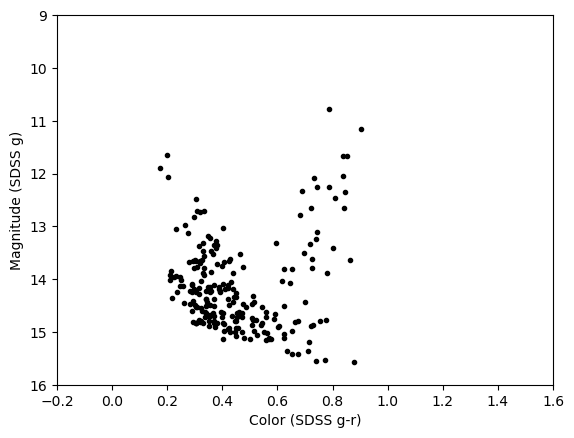

In [11]:
test_time()

cluster_cuts = dict(
    cone_search_radius=8,
    minimum_radial_velocity=10, #km/s
    maximum_radial_velocity=50, #km/s
    proper_motion_delta=5,
    proper_motion_ra=0,
    proper_motion_dec=1,
    minimum_parallax=0.5, 
    maximum_parallax=2,
)

# SHOW THE CLUSTER DATA BASED ON THE ABOVE CUTS
show_cluster_data(**cluster_cuts) 

---
<table align="left">
  <tr>
    <td><img src="./stop-sign.png" width=40% height=40%></img> </td>
    <td><h1>CHECK POINT</h1><h3>Check with an instructor before continuing please!</h3></td>
  </tr>
</table>

<div style="clear: both;"></div>

---
### 6. The Final Challenge: Applying a Model to the Dataset

For our final challenge, try to model the cluster dataset that you generated in the last section by changing the age of and distance of the isochrone to get the best fit to the data! (You can do this by changing the numbers next to `age=` and `distance=`). Fitting a dataset means finding the model that best represents the data. This can be done a variety of different ways, but for now, you can change the age and distance by hand to find the isochrone that looks the most like the data. 

Hint: Think about what ages make sense. How old is the Universe? How old is the Sun? 

Hint 2: These stars are within the Milky Way, so you can narrow down the maximum distance. The closest stars are 1pc away. 

Once you find what you think is the best fitting isochrone, compare with your neighbors! What age and distance did you get? How did that compare to your neighbor? If they are different, why do you think that is?

In [ ]:
test_time()

ax = show_cluster_data(**cluster_cuts)

show_isochrone(
    age = 1, 
    distance = 400,
    ax = ax,
    color = 'red' # or whatever your favorite color is...
)
ax.invert_yaxis()